Previewing the dataset for the quiz

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#data loading
data_url = "https://github.com/HamoyeHQ/HDSC-Introduction-to-Python-for-machine-learning/files/7768140/FoodBalanceSheets_E_Africa_NOFLAG.csv"

data = pd.read_csv(data_url, encoding="latin")
data.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [3]:
#checking for null values
data.isna().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [4]:

#Question 11
q11 = data.groupby("Item")["Y2014", "Y2017"].sum()
q11

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Y2014,Y2017
Item,,
"Alcohol, Non-Food",2403.00,2348.00
Alcoholic Beverages,102410.11,95581.06
Animal Products,11935.65,11547.65
Animal fats,209460.54,269617.53
Apples and products,9499.23,10198.90
...,...,...
"Vegetables, Other",155038.96,157752.59
Vegetal Products,107145.19,107655.20
Wheat and products,232670.13,240047.62


In [5]:
#Quantity 12
q12_mean = round(data.Y2015.mean(), 3)
q12_std = round(data.Y2015.std(), 3)

print(q12_mean, q12_std)

135.236 1603.404


In [6]:
#Question 13
q13_total = len(data.Y2016)
q13_missing = data.Y2016.isna().sum()
q13_missing_perc = round((q13_missing/q13_total)*100, 2)
print(q13_missing, q13_missing_perc)

1535 2.52


In [7]:

#Question 14
q14 = data.corr()
q14

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


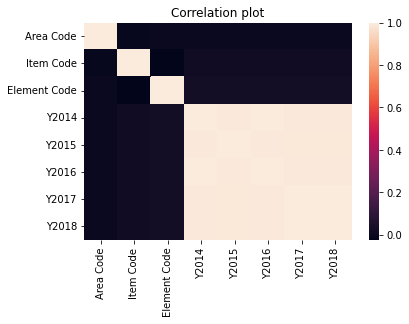

In [8]:

#Question 14 plot
plt.title("Correlation plot")
sns.heatmap(data.corr())

In [9]:
#Question 15

#get the columns
columns = list(data.columns)

#create a list to hold the years columns
years = []

#A for loop to select the columns
for col in columns:
    if col.startswith("Y"):
        years.append(col)
    else:
        continue

#Using groupby to get the selected columns
q15 = data.groupby(by = [data["Element"] == "Import Quantity"])[years].sum()

print(q15)
print()
locs = q15.values[1].max()

print(locs)

              Y2014       Y2015       Y2016       Y2017       Y2018
Element                                                            
False    7690941.65  7765321.77  7825889.87  8081170.10  8266632.87
True      274144.48   267018.46   286582.78   294559.09   287997.09

294559.0900000001


In [10]:

#Highest Element for 2018
q17 = data.groupby("Element")["Element", "Y2018"].sum().sort_values(by="Y2018", ascending=False)
q17[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Y2018
Element,
Domestic supply quantity,2161192.10
Production,2075072.89
Food,1303841.28
Total Population - Both sexes,1140605.00
Food supply (kcal/capita/day),455261.00


In [11]:

#Third lowest Element for 2018
q18 = q17.sort_values(by="Y2018", ascending=True)
q18[:5]

,Y2018
Element,
Tourist consumption,90.00
Fat supply quantity (g/capita/day),10258.69
Protein supply quantity (g/capita/day),11833.56
Stock Variation,20577.91
Seed,25263.14


In [12]:

#Import quantity for 2018
q19 = data.groupby(by=["Area", "Element"])["Y2018"].sum()
q19[:20]

Area     Element                               
Algeria  Domestic supply quantity                  90023.42
         Export Quantity                             811.54
         Fat supply quantity (g/capita/day)          309.09
         Feed                                      10668.00
         Food                                      63736.33
         Food supply (kcal/capita/day)             13288.00
         Food supply quantity (kg/capita/yr)        1509.28
         Import Quantity                           36238.29
         Losses                                     7708.00
         Other uses (non-food)                      3970.08
         Processing                                 2479.00
         Production                                60766.67
         Protein supply quantity (g/capita/day)      367.28
         Residuals                                   630.00
         Seed                                        825.00
         Stock Variation                            

In [13]:
#Number of unique values in "Area"
q20 = data.Area.nunique()
q20

49